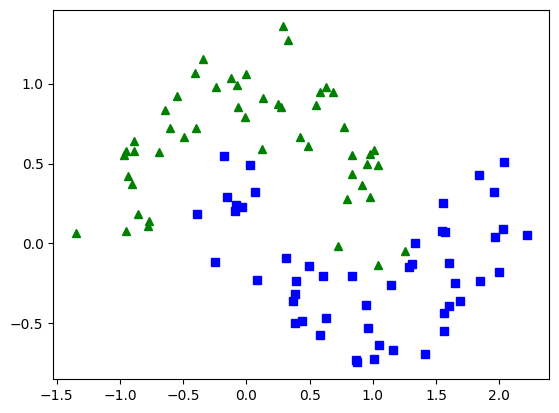

Exactitud del modelo: 0.85
Mejores hiperparámetros: {'max_depth': None, 'n_estimators': 10}


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

#Genera los datos
X, y = make_moons(n_samples=100, noise=0.2)

# Graficando
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")# When the label y is 0
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "g^")# When the label y is 1
plt.show()

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Inicialización del modelo
model = RandomForestClassifier()
# Entrenamiento del modelo
model.fit(X_train, y_train)
# Evaluación del modelo
accuracy = model.score(X_test, y_test)
print("Exactitud del modelo:", accuracy)

# Ajuste de hiperparámetros con búsqueda de cuadrícula
param_grid = {'n_estimators': [10, 20, 30],
          	'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Mejor configuración de hiperparámetros
best_params = grid_search.best_params_
print("Mejores hiperparámetros:", best_params)

# Regresion

La correlación entre horas de estudio y calificación del examen es: 1.0


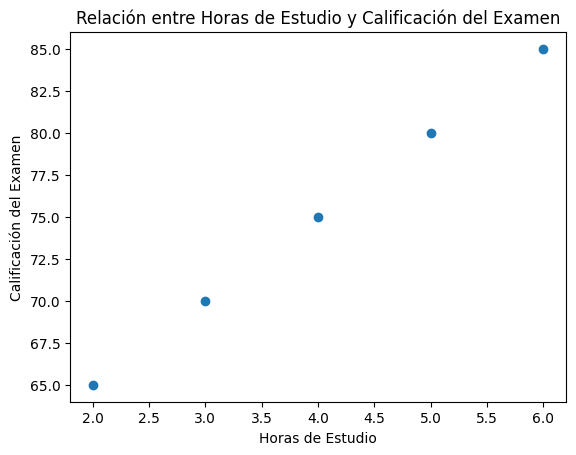

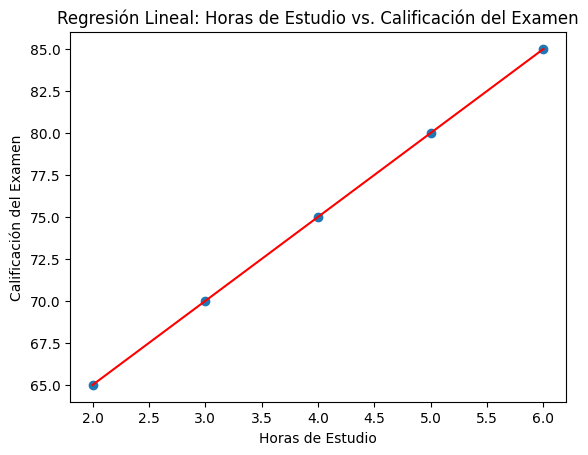

In [ ]:
import numpy as np
horas_estudio = np.array([2, 3, 4, 5, 6])
calificacion_examen = np.array([65, 70, 75, 80, 85])

def calcular_correlacion(x, y):
    correlacion = np.corrcoef(x, y)[0, 1]
    return correlacion
correlacion = calcular_correlacion(horas_estudio, calificacion_examen)
print("La correlación entre horas de estudio y calificación del examen es:", correlacion)

import matplotlib.pyplot as plt

plt.scatter(horas_estudio, calificacion_examen)
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación del Examen')
plt.title('Relación entre Horas de Estudio y Calificación del Examen')
plt.show()

from sklearn.linear_model import LinearRegression
modelo_regresion = LinearRegression()
modelo_regresion.fit(horas_estudio.reshape(-1, 1), calificacion_examen)
plt.scatter(horas_estudio, calificacion_examen)
plt.plot(horas_estudio, modelo_regresion.predict(horas_estudio.reshape(-1, 1)), color='red')
plt.xlabel('Horas de Estudio')
plt.ylabel('Calificación del Examen')
plt.title('Regresión Lineal: Horas de Estudio vs. Calificación del Examen')
plt.show()


Modelo Lineal y Aplicación en la Predicción:


In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos ficticios
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 3 * X.squeeze() + np.random.randn(100) * 3  # Generar y = 3X + ruido

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)


Error cuadrático medio: 8.25977922274286


Método de Mínimos Cuadrados:

In [ ]:
# Definir la función para el método de mínimos cuadrados
def least_squares(X, y):
	X = np.c_[np.ones((X.shape[0], 1)), X]  # Agregar columna de unos para el término de intercepción
	coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
	return coefficients

# Usar la función para ajustar un modelo
coefficients = least_squares(X, y)


Interpretación de la Pendiente y la Intersección:


Intersección: 0.6190205661343011
Coeficientes de la pendiente: [2.99415546]


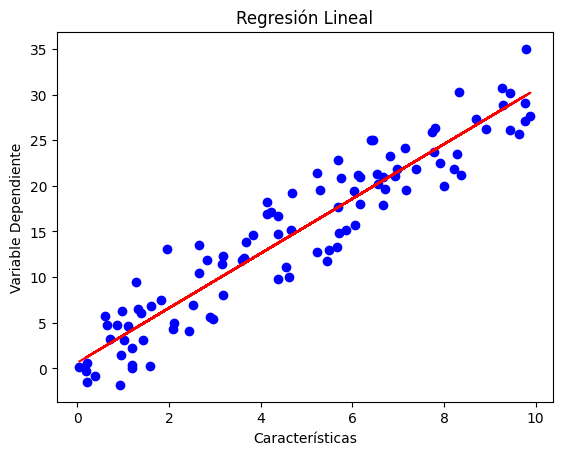

In [ ]:
# Extraer los coeficientes de la pendiente e intersección del modelo de Regresión Lineal
intercept = model.intercept_
coefficients = model.coef_
print("Intersección:", intercept)
print("Coeficientes de la pendiente:", coefficients)

# Graficar la línea de regresión
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue')
plt.plot(X, model.predict(X), color='red')  # Línea de regresión
plt.xlabel('Características')
plt.ylabel('Variable Dependiente')
plt.title('Regresión Lineal')
plt.show()


Regresión Polinomial:


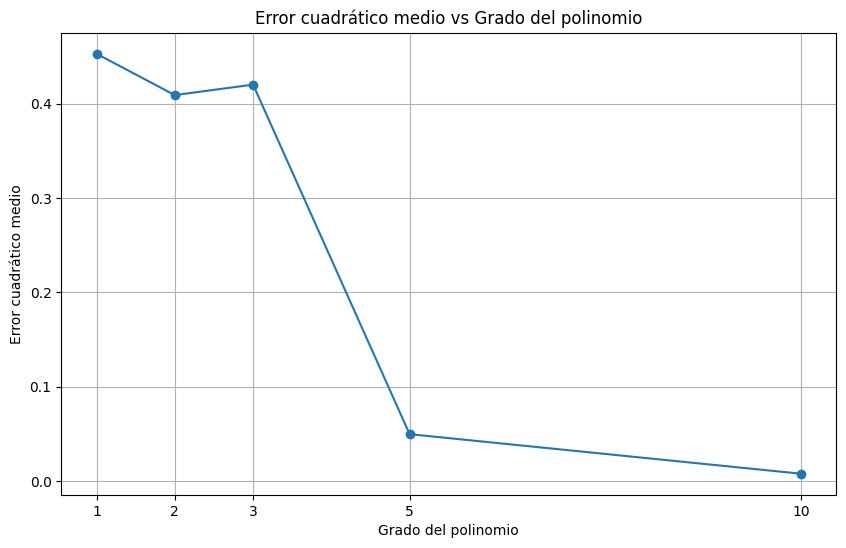

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generar datos ficticios
np.random.seed(0)
X = np.sort(10 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Generar una función sinusoidal con ruido

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar diferentes grados de polinomios y calcular el error cuadrático medio en el conjunto de prueba
degrees = [1, 2, 3, 5, 10]
mse_list = []

for degree in degrees:
	poly_features = PolynomialFeatures(degree=degree)
	X_train_poly = poly_features.fit_transform(X_train)
	X_test_poly = poly_features.transform(X_test)

	model = LinearRegression()
	model.fit(X_train_poly, y_train)

	y_pred = model.predict(X_test_poly)
	mse = mean_squared_error(y_test, y_pred)
	mse_list.append(mse)

# Graficar el error cuadrático medio en función del grado del polinomio
plt.figure(figsize=(10, 6))
plt.plot(degrees, mse_list, marker='o')
plt.title('Error cuadrático medio vs Grado del polinomio')
plt.xlabel('Grado del polinomio')
plt.ylabel('Error cuadrático medio')
plt.xticks(degrees)
plt.grid(True)
plt.show()


Regresión Logarítmica:

In [ ]:
import numpy as np

# Generar datos ficticios con una relación logarítmica creciente
np.random.seed(0)
X = np.linspace(1, 10, 100)
y = 2 * np.log(X) + np.random.normal(0, 0.2, 100)  # Función logarítmica con ruido gaussiano

from scipy.optimize import curve_fit

def logarithmic_function(x, a, b):
	return a * np.log(x) + b

# Ajustar la curva logarítmica a los datos
params, _ = curve_fit(logarithmic_function, X, y)
a, b = params

print("Coeficiente 'a':", a)
print("Coeficiente 'b':", b)
print("Interpretación:")
print("El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.")
print("El coeficiente 'b' representa el intercepto de la curva logarítmica.")


Coeficiente 'a': 1.9380668967409198
Coeficiente 'b': 0.10822350530434788
Interpretación:
El coeficiente 'a' representa el crecimiento o decrecimiento logarítmico de la variable dependiente por cada unidad de cambio en la variable independiente.
El coeficiente 'b' representa el intercepto de la curva logarítmica.


Ejemplo de aplicación en economía

In [ ]:
# Generar datos ficticios para el crecimiento del PIB en función del tiempo
X_economy = np.linspace(1, 10, 100)
y_economy = 3 * np.log(X_economy) + np.random.normal(0, 0.2, 100)  # Función logarítmica con ruido gaussiano
# Aplicar el mismo procedimiento de ajuste de curva logarítmica
params_economy, _ = curve_fit(logarithmic_function, X_economy, y_economy)


Ejemplo de aplicación en biología:

In [ ]:
# Generar datos ficticios para el crecimiento de una población de organismos en función del tiempo
X_biology = np.linspace(1, 10, 100)
y_biology = 2 * np.log(X_biology) + np.random.normal(0, 0.2, 100)  # Función logarítmica con ruido gaussiano
# Aplicar el mismo procedimiento de ajuste de curva logarítmica
params_biology, _ = curve_fit(logarithmic_function, X_biology, y_biology)


Regresión Logística:


In [ ]:
import numpy as np

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.weights = np.zeros(n)
        self.bias = 0

        # Gradiente descendente
        for _ in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Cálculo del gradiente
            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            # Actualización de parámetros
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generar datos de ejemplo
X, y = make_classification(n_samples=1000, n_features=5, n_classes=2, random_state=42)

# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en conjunto de prueba
y_pred = model.predict(X_test)

# Calcular precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo de regresión logística:", accuracy)


Precisión del modelo de regresión logística: 0.865


In [ ]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression

# Crear y entrenar modelo de regresión logística de sklearn
sklearn_model = SklearnLogisticRegression()
sklearn_model.fit(X_train, y_train)

# Predecir en conjunto de prueba
sklearn_y_pred = sklearn_model.predict(X_test)

# Calcular precisión
sklearn_accuracy = accuracy_score(y_test, sklearn_y_pred)
print("Precisión del modelo de regresión logística de sklearn:", sklearn_accuracy)


Precisión del modelo de regresión logística de sklearn: 0.88


# Árboles de Decisión

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un clasificador de árbol de decisión
clf = DecisionTreeClassifier()

# Entrenar el clasificador
clf.fit(X_train, y_train)

# Evaluar el rendimiento del clasificador
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador de árbol de decisión:", accuracy)


Precisión del clasificador de árbol de decisión: 1.0


In [ ]:
# Crear un clasificador de árbol de decisión con parámetros personalizados
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=5, random_state=42)

# Entrenar el clasificador con los parámetros personalizados
clf.fit(X_train, y_train)

# Evaluar el rendimiento del clasificador con los parámetros personalizados
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador de árbol de decisión (con parámetros personalizados):", accuracy)

Precisión del clasificador de árbol de decisión (con parámetros personalizados): 1.0


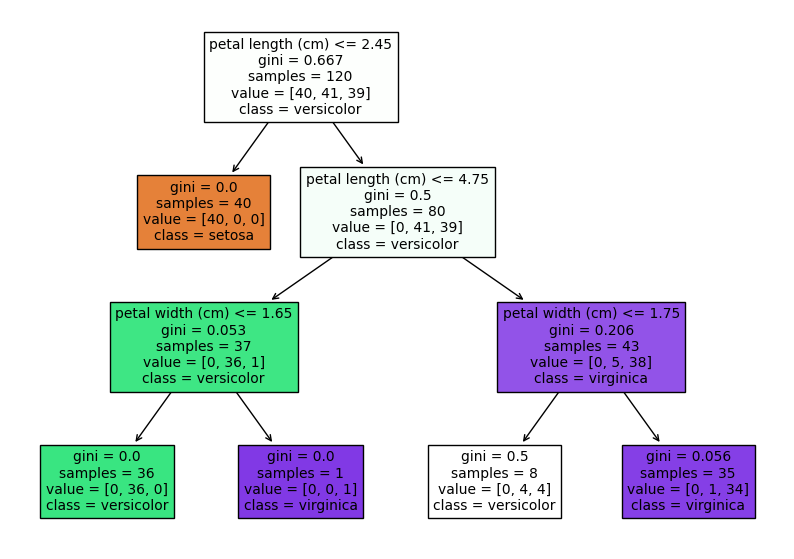

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizar el árbol de decisión
plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Crear clasificadores con diferentes algoritmos de árboles de decisión
clf_id3 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_c45 = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_cart = DecisionTreeClassifier(criterion='gini', random_state=42)

# Evaluar los clasificadores utilizando validación cruzada
scores_id3 = cross_val_score(clf_id3, X, y, cv=5)
scores_c45 = cross_val_score(clf_c45, X, y, cv=5)
scores_cart = cross_val_score(clf_cart, X, y, cv=5)

# Imprimir los resultados de la validación cruzada
print("Precisión media de ID3:", scores_id3.mean())
print("Precisión media de C4.5:", scores_c45.mean())
print("Precisión media de CART:", scores_cart.mean())


Precisión media de ID3: 0.9533333333333334
Precisión media de C4.5: 0.9533333333333334
Precisión media de CART: 0.9533333333333334


Bosques Aleatorios

In [ ]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Cargar el conjunto de datos Iris
iris = load_iris()
X, y = iris.data, iris.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un clasificador de Bosques Aleatorios
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el rendimiento del clasificador
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador de Bosques Aleatorios:", accuracy)


Precisión del clasificador de Bosques Aleatorios: 1.0


In [ ]:
# Crear y entrenar un clasificador de Bosques Aleatorios con parámetros personalizados
clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, random_state=42)
clf.fit(X_train, y_train)

# Evaluar el rendimiento del clasificador con los parámetros personalizados
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del clasificador de Bosques Aleatorios (con parámetros personalizados):", accuracy)


Precisión del clasificador de Bosques Aleatorios (con parámetros personalizados): 1.0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Crear y entrenar un clasificador de árbol de decisión
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)

# Evaluar el rendimiento del clasificador de árbol de decisión
y_pred_dt = dt_clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Precisión del clasificador de árbol de decisión:", accuracy_dt)


Precisión del clasificador de árbol de decisión: 1.0


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Cargar el conjunto de datos california House Prices
california = fetch_california_housing()
X, y = california.data, california.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un regresor de Bosques Aleatorios
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train, y_train)

# Evaluar el rendimiento del regresor
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio del regresor de Bosques Aleatorios:", mse)


Error cuadrático medio del regresor de Bosques Aleatorios: 0.2553684927247781


# Máquinas de Soporte Vectorial (SVM)

Clasificación con SVM utilizando scikit-learn


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Generar datos de clasificación ficticios
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar un modelo SVM para clasificación
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Precisión del modelo SVM para clasificación:", accuracy)

Precisión del modelo SVM para clasificación: 1.0


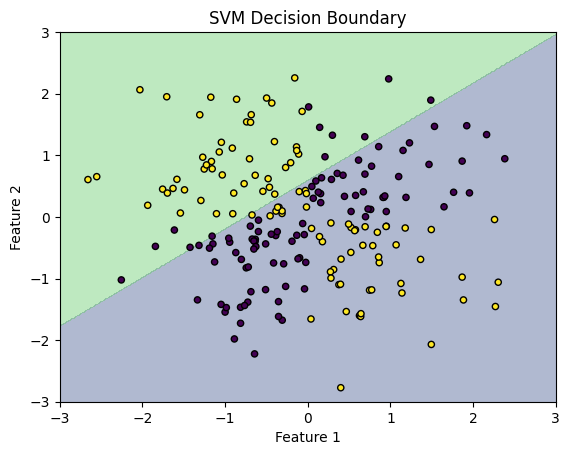

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generar datos ficticios para visualización
np.random.seed(0)
X_visualization = np.random.randn(200, 2)
y_visualization = np.logical_xor(X_visualization[:, 0] > 0, X_visualization[:, 1] > 0)

# Entrenar un modelo SVM
svm_classifier_visualization = SVC(kernel='linear')
svm_classifier_visualization.fit(X_visualization, y_visualization)

# Crear una malla para visualizar la frontera de decisión
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                 	np.linspace(-3, 3, 500))
Z = svm_classifier_visualization.predict(np.c_[xx.ravel(), yy.ravel()])

# Visualizar la frontera de decisión
plt.contourf(xx, yy, Z.reshape(xx.shape), alpha=0.4)
plt.scatter(X_visualization[:, 0], X_visualization[:, 1], c=y_visualization, s=20, edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')
plt.show()


In [ ]:
# Crear y entrenar modelos SVM con diferentes kernels
svm_classifier_rbf = SVC(kernel='rbf')
svm_classifier_poly = SVC(kernel='poly')
svm_classifier_rbf.fit(X_train, y_train)
svm_classifier_poly.fit(X_train, y_train)

# Predecir etiquetas para el conjunto de prueba
y_pred_rbf = svm_classifier_rbf.predict(X_test)
y_pred_poly = svm_classifier_poly.predict(X_test)

# Calcular la precisión de los modelos
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print("Precisión del modelo SVM con kernel RBF:", accuracy_rbf)
print("Precisión del modelo SVM con kernel Polinomial:", accuracy_poly)


Precisión del modelo SVM con kernel RBF: 1.0
Precisión del modelo SVM con kernel Polinomial: 1.0


SVM para regresión:


Error cuadrático medio del modelo SVM para regresión: 173.5252840539902


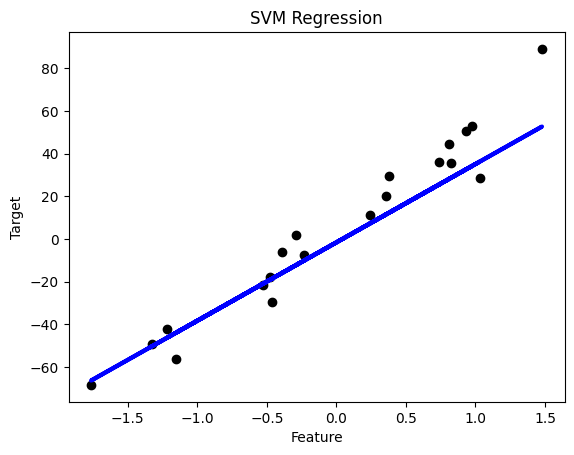

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np

# Generar datos de regresión ficticios
X_regression, y_regression = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

# Crear y entrenar un modelo SVM para regresión
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train, y_train)

# Predecir valores para el conjunto de prueba
y_pred = svm_regressor.predict(X_test)
# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio del modelo SVM para regresión:", mse)

# Visualizar resultados
plt.scatter(X_test, y_test, color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title('SVM Regression')
plt.show()


# Algoritmos de Agrupamiento

In [ ]:
import numpy as np
# Generar datos aleatorios con dos características para la demostración
np.random.seed(0)
X = np.random.rand(100, 2)
print("Datos generados aleatoriamente:")
print(X[:5])


Datos generados aleatoriamente:
[[0.5488135  0.71518937]
 [0.60276338 0.54488318]
 [0.4236548  0.64589411]
 [0.43758721 0.891773  ]
 [0.96366276 0.38344152]]


In [ ]:
from scipy.spatial.distance import euclidean
# Calcular la distancia euclidiana entre dos puntos
point1 = [1, 2]
point2 = [4, 6]
distance = euclidean(point1, point2)
print("Distancia Euclidiana entre los puntos:", distance)


Distancia Euclidiana entre los puntos: 5.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


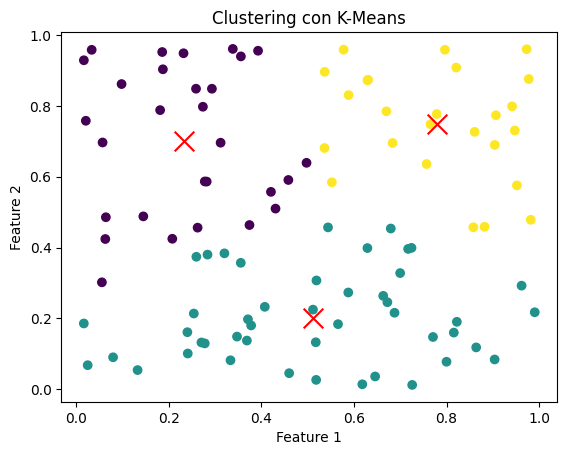

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
# Generar datos aleatorios para clustering
X = np.random.rand(100, 2)

# Inicializar y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Visualizar los clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', color='red', s=200)
plt.title("Clustering con K-Means")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


Aplicación de Clustering en un Conjunto de Datos Real


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


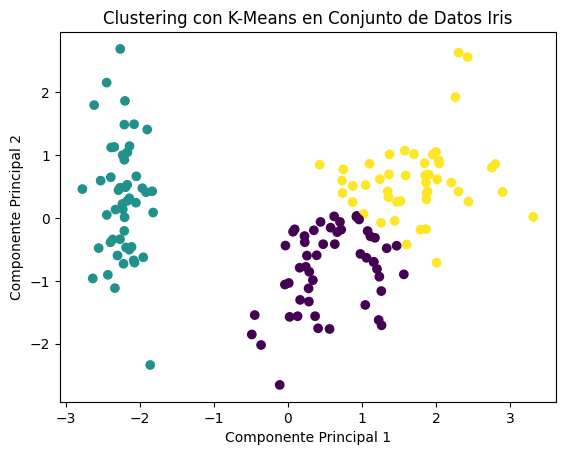

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reducir dimensionalidad con PCA para visualización
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Inicializar y ajustar el modelo K-Means
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)

# Visualizar los clusters
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("Clustering con K-Means en Conjunto de Datos Iris")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()


agrupamiento jerárquico

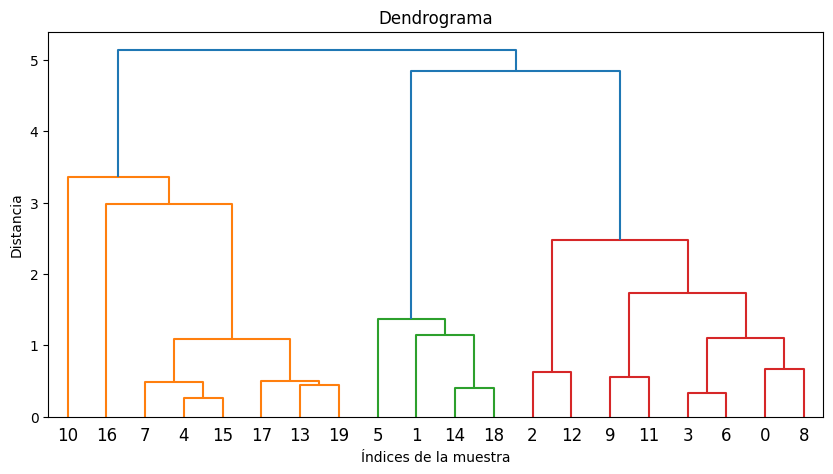

In [ ]:
# Visualización de dendrogramas
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar datos aleatorios
np.random.seed(0)
X = np.random.randn(20, 2)

# Calcular la matriz de enlace
Z = linkage(X, 'ward')

# Visualizar dendrograma
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.title('Dendrograma')
plt.xlabel('Índices de la muestra')
plt.ylabel('Distancia')
plt.show()


In [ ]:
# Implementación de agrupamiento jerárquico en Python
from sklearn.cluster import AgglomerativeClustering

# Generar datos aleatorios
np.random.seed(0)
X = np.random.randn(20, 2)

# Crear una instancia del modelo de agrupamiento jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')

# Ajustar el modelo a los datos
clusters = model.fit_predict(X)

# Imprimir resultados
print("Clusters:", clusters)


Clusters: [1 2 1 1 0 2 1 0 1 1 0 1 1 0 2 0 0 0 2 0]


DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
def custom_dbscan(data, epsilon, minPts):
	dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
	labels = dbscan.fit_predict(data)
	return labels


In [ ]:
def identify_points(labels):
	unique_labels = set(labels)
	core_points = sum(1 for label in labels if label != -1)
	border_points = sum(1 for label in labels if label == -1)
	noise_points = sum(1 for label in labels if label == 0)
	return core_points, border_points, noise_points

# Ejemplo de uso
labels = [0, 1, -1, 1, 2, 2, 0, -1]
core, border, noise = identify_points(labels)
print("Puntos centrales:", core)
print("Puntos de frontera:", border)
print("Puntos de ruido:", noise)


Puntos centrales: 6
Puntos de frontera: 2
Puntos de ruido: 2


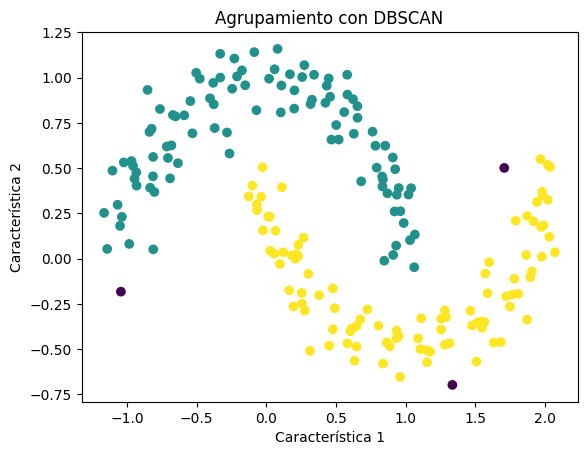

In [ ]:
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

# Generar datos sintéticos
np.random.seed(0)
X, _ = make_moons(n_samples=200, noise=0.1)

# Aplicar DBSCAN
epsilon = 0.2
minPts = 5
labels = custom_dbscan(X, epsilon, minPts)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.title('Agrupamiento con DBSCAN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


Mean Shift:

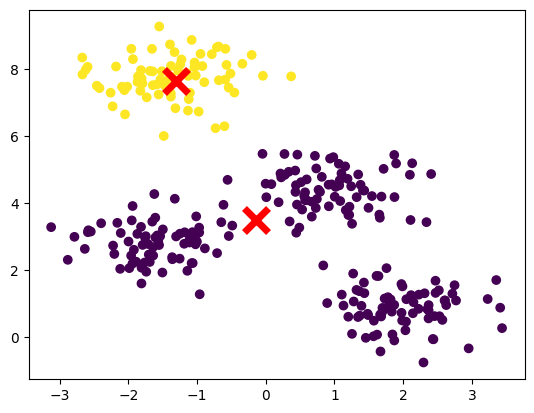

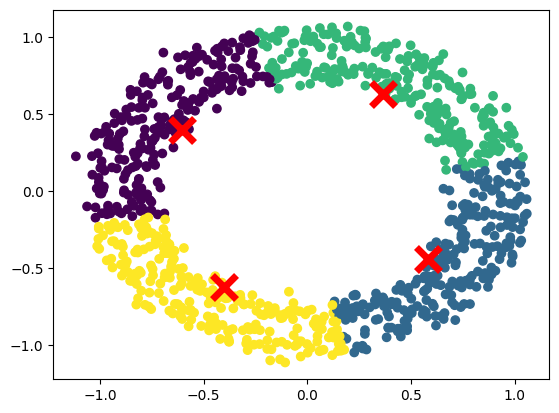

In [ ]:
#Implementación de Mean Shift en Python
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Aplicar Mean Shift
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Visualizar los resultados
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red', s=300, linewidth=5)
plt.show()

#Ejemplo de uso en agrupamiento de datos
from sklearn.datasets import make_circles

# Generar datos ficticios en forma de anillo concéntrico
X, _ = make_circles(n_samples=1000, noise=0.05, random_state=42)

# Aplicar Mean Shift
ms = MeanShift()
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Visualizar los resultados
plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
plt.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', color='red', s=300, linewidth=5)
plt.show()


Gaussian Mixture Models (GMM)


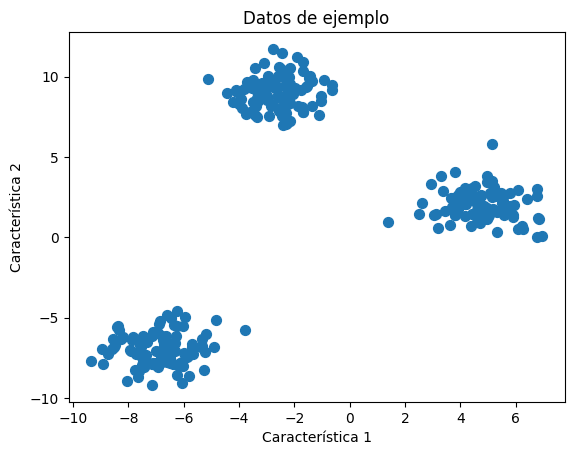

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generar datos sintéticos con 3 clústeres
X, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos de ejemplo")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()


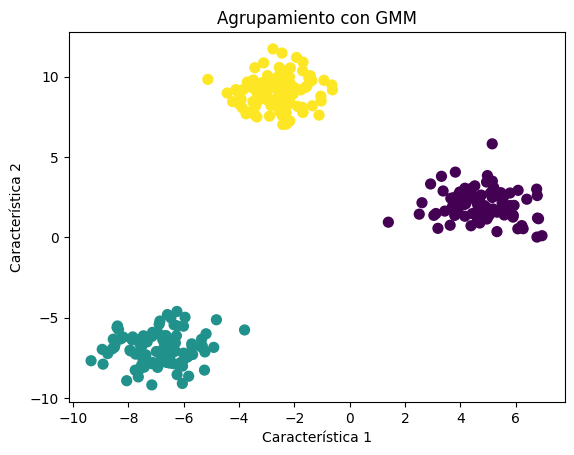

In [ ]:
from sklearn.mixture import GaussianMixture

# Crear el modelo GMM con 3 componentes
gmm = GaussianMixture(n_components=3, random_state=42)

# Ajustar el modelo a los datos
gmm.fit(X)

# Obtener las etiquetas de clúster para cada punto de datos
labels = gmm.predict(X)

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Agrupamiento con GMM")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()


Spectral Clustering:

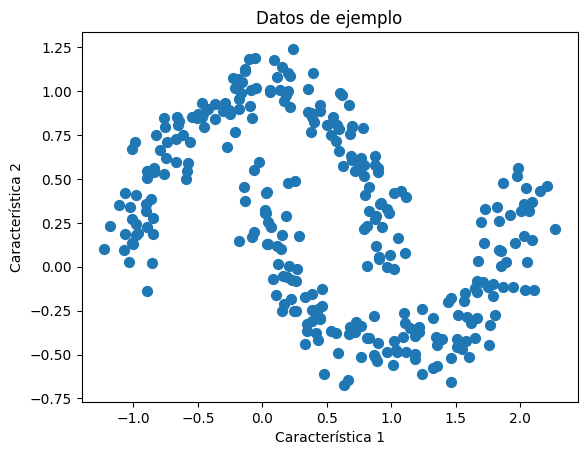

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generar datos sintéticos con forma de media luna
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Visualizar los datos
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Datos de ejemplo")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()


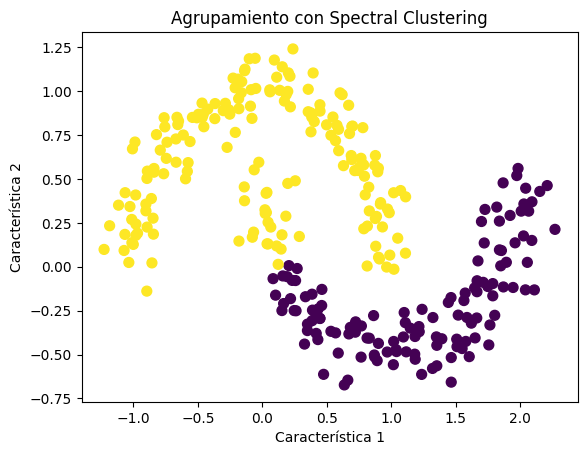

In [ ]:
from sklearn.cluster import SpectralClustering

# Crear el modelo Spectral Clustering con 2 clústeres
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)

# Ajustar el modelo a los datos
spectral.fit(X)

# Obtener las etiquetas de clúster para cada punto de datos
labels = spectral.labels_

# Visualizar los resultados
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.title("Agrupamiento con Spectral Clustering")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")
plt.show()



Comparación entre GMM y Spectral Clustering


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


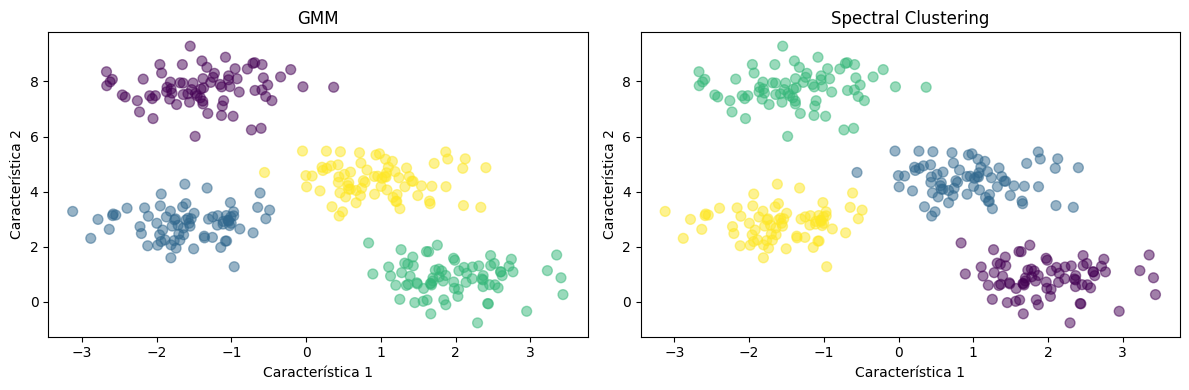

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.cluster import SpectralClustering

# Generar datos sintéticos
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Ajustar modelo GMM
gmm = GaussianMixture(n_components=4).fit(X)
labels_gmm = gmm.predict(X)

# Ajustar modelo Spectral Clustering
spectral = SpectralClustering(n_clusters=4, affinity='nearest_neighbors', assign_labels='kmeans')
labels_spectral = spectral.fit_predict(X)

# Comparación visual de GMM y Spectral Clustering en los mismos datos
plt.figure(figsize=(12, 4))

# GMM
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, s=50, cmap='viridis', alpha=0.5)
plt.title("GMM")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

# Spectral Clustering
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=labels_spectral, s=50, cmap='viridis', alpha=0.5)
plt.title("Spectral Clustering")
plt.xlabel("Característica 1")
plt.ylabel("Característica 2")

plt.tight_layout()
plt.show()


#Evaluación de modelos

Implementación de Validación Cruzada


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Generación de datos ficticios
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Inicialización del modelo
clf = DecisionTreeClassifier()

# Validación cruzada con 5 folds
scores = cross_val_score(clf, X, y, cv=5)
print("Accuracy:", scores.mean())


Accuracy: 0.8630000000000001


Curvas de Aprendizaje


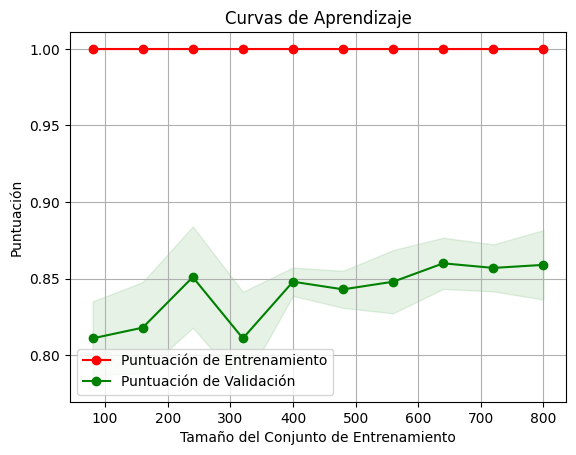

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification

# Generación de datos ficticios
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Inicialización del modelo
clf = DecisionTreeClassifier()

# Cálculo de las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(
	clf, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

# Visualización de las curvas de aprendizaje
plt.figure()
plt.title("Curvas de Aprendizaje")
plt.xlabel("Tamaño del Conjunto de Entrenamiento")
plt.ylabel("Puntuación")
plt.grid()

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
             	train_scores_mean + train_scores_std, alpha=0.1,
             	color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
             	test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
     	label="Puntuación de Entrenamiento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
     	label="Puntuación de Validación")

plt.legend(loc="best")
plt.show()


Interpretación de Métricas de Evaluación


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generación de datos ficticios
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# División de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicialización del modelo
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Predicciones sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Cálculo de métricas de evaluación
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precisión:", precision)
print("Recall:", recall)
print("F1-score:", f1)


Precisión: 0.9072164948453608
Recall: 0.822429906542056
F1-score: 0.8627450980392157


In [ ]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# Cargar el conjunto de datos
digits = load_digits()
X, y = digits.data, digits.target

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Entrenar el modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
# Realizar predicciones
y_pred = model.predict(X_test)
# Calcular métricas de evaluación
confusion_matrix = confusion_matrix(y_test, y_pred)

# Mostrar las métricas
print("confusion_matrix:", confusion_matrix)


confusion_matrix: [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 45  0  0  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Evaluación de Regresión


In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Generar datos sintéticos para regresión
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar y entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de error
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 104.20222653187027
Mean Absolute Error (MAE): 8.416659922209051
Root Mean Squared Error (RMSE): 10.207949183448665
R-squared (R²): 0.9374151607623286


métricas de evaluación para modelos de agrupación

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, adjusted_rand_score, homogeneity_completeness_v_measure

# Generar datos sintéticos para agrupación
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Inicializar y ajustar un modelo de KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# Calcular el índice de silueta
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Calcular la inercia
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Calcular el índice de Rand ajustado
ari = adjusted_rand_score(y_true, kmeans.labels_)
print("Adjusted Rand Index:", ari)

# Calcular la homogeneidad, completitud y puntuación V-measure
homo, comp, v_measure = homogeneity_completeness_v_measure(y_true, kmeans.labels_)
print("Homogeneity:", homo)
print("Completeness:", comp)
print("V-Measure:", v_measure)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score: 0.6819938690643478
Inertia: 212.00599621083484
Adjusted Rand Index: 1.0
Homogeneity: 1.0
Completeness: 1.0
V-Measure: 1.0
